#### JSE listed companies 
      :Netcare limited group
      :Santam limited
      :Sanlam group limited 
      :Nedbank Group Ltd

# Netcare Limited
Netcare (Network Healthcare Holdings Limited) is a South African health care company. It is the largest provider of private healthcare (ahead of LIFE Healthcare, formally known as Afrox Healthcare and Mediclinic International) in both South Africa and the United Kingdom. It acquired a controlling stake in the UK's General Healthcare Group in 2006, and provides services to the National Health Service via its subsidiary General Healthcare Group

In [3]:
#importing the modules in python
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
import statsmodels.tsa.api as smt
import matplotlib.dates as dates
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
pd.options.display.width = 600
#load the data 
filename = 'ntc.csv'
netcareTS = pd.read_csv(filename,na_filter=True,index_col="Date").dropna()
netcareTS.head(5)



,Open,High,Low,Close,Volume
Date,,,,,
13/01/02,1985,1990,1963,1975.0,514952
13/01/03,1974,1976,1960,1970.0,584990
13/01/04,1969,2011,1954,2000.0,3130465
13/01/07,2005,2010,1977,1990.0,1483949
13/01/08,2000,2000,1986,2000.0,1269313


$\textbf{Plot the closing prices}$

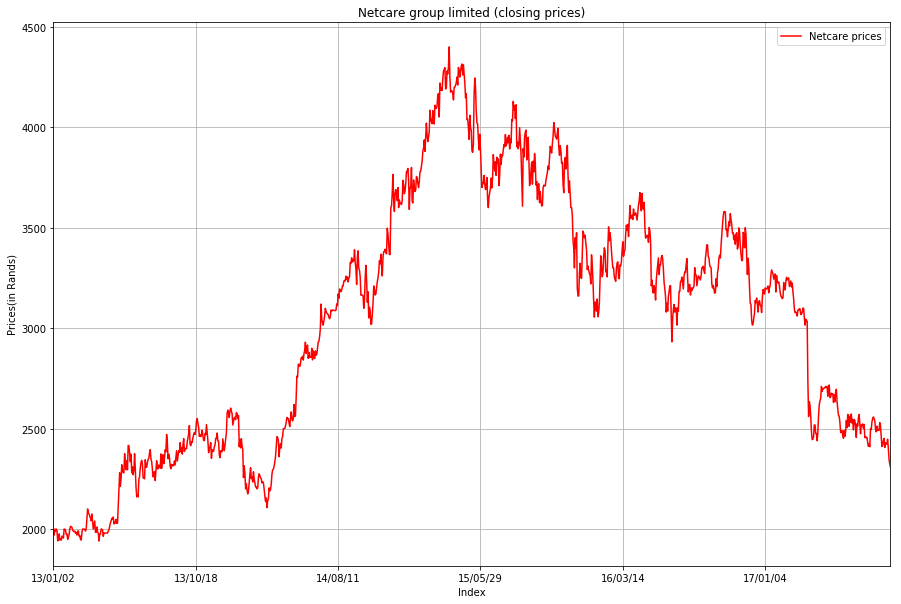

In [4]:
plt.figure(figsize=(15,10))
netcareTS["Close"].plot(label="Netcare prices",color="red")
plt.grid(True)
plt.title("Netcare group limited (closing prices)",color="black")
plt.xlabel("Index")
plt.ylabel("Prices(in Rands)")
plt.legend(loc=1)

$\textbf{The log-returns}$ calculated as:   $r_{t}=log\Big(\frac{p_{t}}{p_{t-1}}\Big)$, where $p_{t}$ is the closing price at time $t$. To analyze the stock price, we usually calculate the logged return of the stock price(closing prices) to make the data stationary.

In [5]:
#The log-returns
returns=np.log((netcareTS["Close"])/(netcareTS["Close"].shift()))
returns.head(5)
returns=returns.dropna()

The following plot shows the daily logged return of Netcare group limited


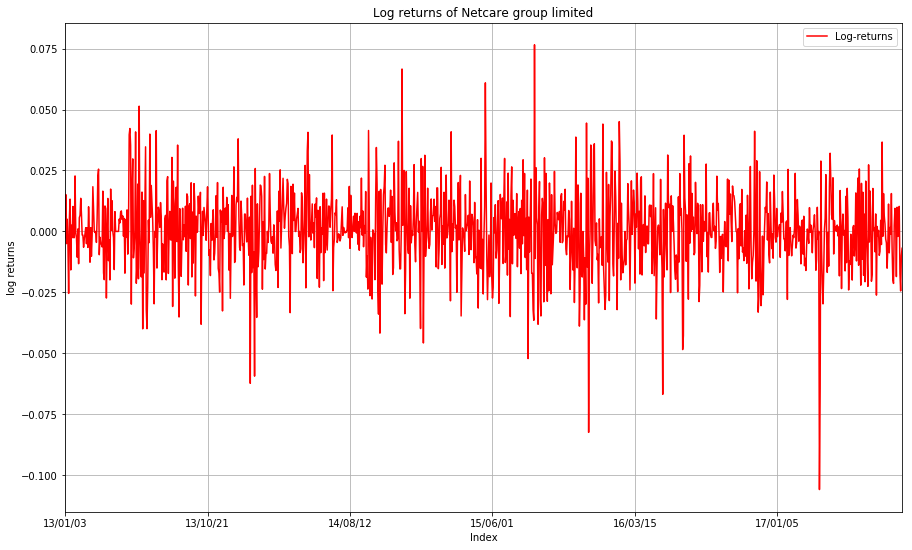

In [6]:
print("The following plot shows the daily logged return of Netcare group limited")
plt.figure(figsize=(15,9))
returns.plot(label="Log-returns",color="red")
plt.grid(True)
plt.title("Log returns of Netcare group limited",color="black")
plt.xlabel("Index")
plt.ylabel("log returns")
plt.legend(loc=0)
plt.show()

$\textbf{Test for stationarity of returns}$: Augmented dickey fuller, Philips perron tests

In [7]:
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]

In [8]:
#stationarity test for the returns series
#The number of lags can be directly set using lags.
#Changing the number of lags makes no difference to the conclusion
#The ADF assumes residuals are white noise, and that the number of lags is sufficient, 
#to pick up any dependence  in the data.

from arch.unitroot import ADF
adf = ADF(netcareTrain1)
adf.lags = 15
print(adf.summary().as_text())
print('The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary')


   Augmented Dickey-Fuller Results   
Test Statistic                 -5.276
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary


In [9]:
#Alternative test for stationarity the Philips perron test
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(netcareTrain1)
pp.lags=15
print(pp.summary().as_text())
print("The test statistic is less than critical values for all significance levels, so we reject the null hypothesis of stationarity")

     Phillips-Perron Test (Z-tau)    
Test Statistic                -24.362
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The test statistic is less than critical values for all significance levels, so we reject the null hypothesis of stationarity


# Split the data into multiple training and testing sets
  

#### split1: Train 500  Test:200
####  split2: Train 700  Test:200

## split1: Train 500  Test:200

In [10]:
netcareTrain1=returns[0:500]
netcareTest1=returns[500:700]

$\textbf{Predictions (test data)}$:

In [11]:
warnings.filterwarnings("ignore") 
from numpy import sqrt
import statsmodels.tsa.api as smt
history=[x for x in netcareTrain1]
test_predicted=list()
for i in range(len(netcareTest1)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.161,-0.78],trend='nc',method='mle')#start_params=[-0.161,-0.78]
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
netcareTest1=list(netcareTest1)


Test=0.029902, Predicted=0.003970
Test=0.000000, Predicted=-0.000694
Test=0.026668, Predicted=-0.000347
Test=-0.045768, Predicted=-0.002707
Test=-0.001930, Predicted=0.003307
Test=0.031248, Predicted=0.001825
Test=-0.010218, Predicted=-0.002363
Test=-0.005420, Predicted=-0.000106
Test=0.002443, Predicted=0.000531
Test=0.017733, Predicted=0.000003
Test=-0.002400, Predicted=-0.001911
Test=-0.006965, Predicted=-0.000700
Test=-0.005391, Predicted=0.000398
Test=0.007807, Predicted=0.000780
Test=0.013319, Predicted=-0.000450
Test=0.000529, Predicted=-0.001661
Test=0.006327, Predicted=-0.000897
Test=0.006549, Predicted=-0.001128
Test=0.013228, Predicted=-0.001263
Test=0.004114, Predicted=-0.002021
Test=0.010212, Predicted=-0.001430
Test=-0.014584, Predicted=-0.001755
Test=0.017880, Predicted=0.000648
Test=0.017815, Predicted=-0.001573
Test=-0.015287, Predicted=-0.002619
Test=-0.007859, Predicted=0.000336
Test=0.005331, Predicted=0.000991
Test=0.007315, Predicted=-0.000081
Test=0.026291, Predi

In [12]:
#Summary results
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  699
Model:                     ARMA(1, 1)   Log Likelihood                1893.003
Method:                           mle   S.D. of innovations              0.016
Date:                Thu, 10 May 2018   AIC                          -3780.007
Time:                        02:21:35   BIC                          -3766.358
Sample:                             0   HQIC                         -3774.730
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3842      0.176      2.188      0.029       0.040       0.728
ma.L1.y       -0.5170      0.162     -3.195      0.001      -0.834      -0.200
                                    Roots           

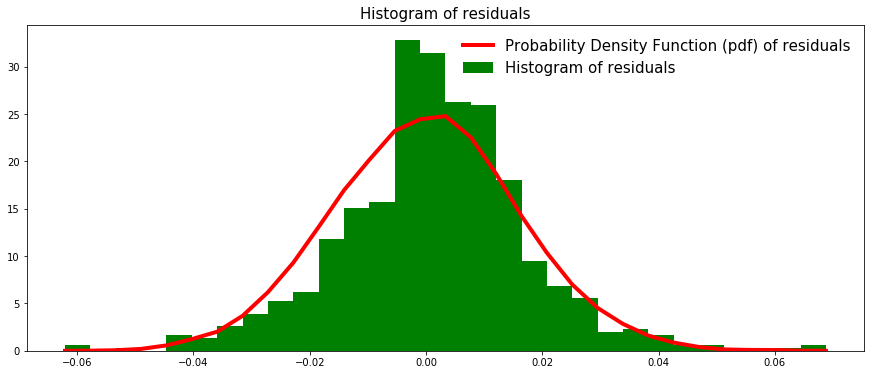

In [13]:
#Histogram and Probability density function of residuals 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

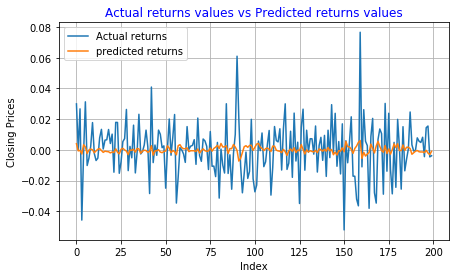

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()

In [15]:
#Durbin-Watson statistic
#The null hypothesis of the test is that there is no serial correlation.
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

1.9982594824697453

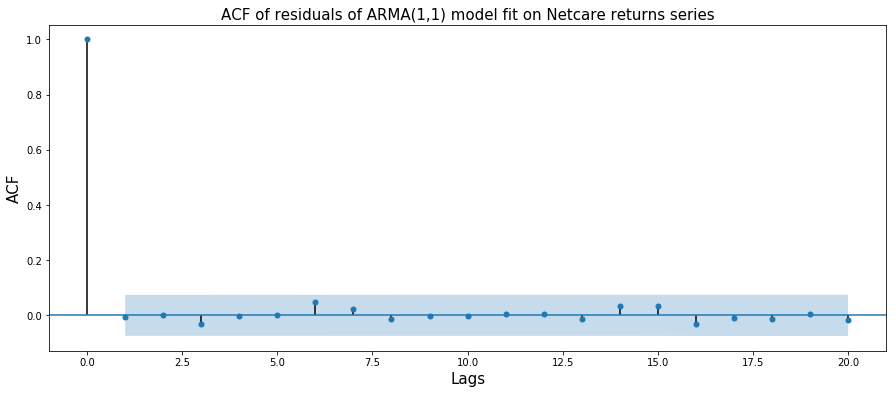

In [16]:

from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import matplotlib.pylab as plt
plt.figure(figsize=(12,8))
sm.graphics.tsa.plot_acf(model.resid, lags=20)
plt.title("ACF of residuals of ARMA(1,1) model fit on Netcare returns series",fontsize=15)
plt.xlabel("Lags",fontsize=15)
plt.ylabel("ACF",fontsize=15)


In [18]:
'''
Ljung-Box test statistics

After identifying the potential time series model for the data, we apply the Ljung box test statistic to
the model residuals to determine if the choosen time series model is a good fit for the data



'''

from pandas import DataFrame
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,0.017920,0.893508
1,0.018072,0.991005
2,0.737494,0.864352
3,0.749304,0.945112
4,0.749491,0.980142
5,2.436783,0.875475
6,2.803143,0.902596
7,2.937812,0.938199
8,2.940691,0.966600


In [19]:
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
netcare_ARMA_ss_500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)

([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,

(200, 200, list)

$\textbf{Count the number of correct direction predictions}$:

In [20]:
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)


The number of correct direction predictions is: 154 out of: 200 data points


$\textbf{Confusion Matrix}$:

Accuracy for testing data:
77.0
[[75 19]
 [27 79]]


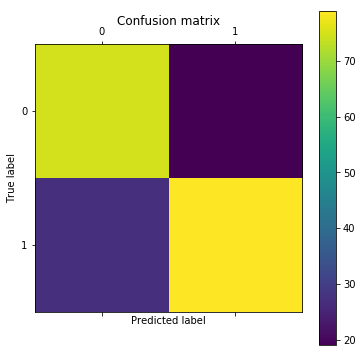

In [21]:
#accuracy decsribes: overall, how often the classifier is correct
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy for testing data:")
def Confusion_matrix(n):
    print(accuracy_score(binary_test[0:n],binary_predicted_test[0:n])*100)
    confusion=confusion_matrix(binary_test[0:n],binary_predicted_test[0:n])
    print(confusion) 
    #show confusion matrix
    plt.matshow(confusion)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
Confusion_matrix(len(binary_test))

In [22]:
print(classification_report(binary_test,binary_predicted_test))
#precision- when it predicts 0 how often is it correct, when it predicts 1 how often is it correct.
#recall-when its 0 how often does it predict 0, when its 1 how often does it predict 1
 #calculate the misclassification  rate
print("The misclassification rate is:",(1-accuracy_score(binary_test,binary_predicted_test))*100,'%')                                                                                

             precision    recall  f1-score   support

          0       0.74      0.80      0.77        94
          1       0.81      0.75      0.77       106

avg / total       0.77      0.77      0.77       200

('The misclassification rate is:', 23.0, '%')


#### split2: Train 700  Test:200

Test=0.012320, Predicted=-0.000011
Test=0.008889, Predicted=-0.001638
Test=0.017296, Predicted=-0.002014
Test=-0.007233, Predicted=-0.003286
Test=-0.009557, Predicted=-0.000731
Test=-0.001771, Predicted=0.000873
Test=-0.002281, Predicted=0.000681
Test=0.008590, Predicted=0.000651
Test=0.005019, Predicted=-0.000795
Test=-0.023811, Predicted=-0.001070
Test=-0.010307, Predicted=0.002596
Test=0.012355, Predicted=0.002683
Test=-0.006931, Predicted=-0.000224
Test=-0.015838, Predicted=0.000795
Test=0.001308, Predicted=0.002494
Test=-0.029172, Predicted=0.001113
Test=-0.011367, Predicted=0.004370
Test=0.038708, Predicted=0.003632
Test=0.007825, Predicted=-0.003139
Test=-0.014920, Predicted=-0.002629
Test=0.019068, Predicted=0.000571
Test=0.011576, Predicted=-0.002223
Test=-0.038852, Predicted=-0.002674
Test=-0.023132, Predicted=0.003782
Test=0.015659, Predicted=0.004962
Test=-0.017566, Predicted=0.000642
Test=-0.018713, Predicted=0.002640
Test=0.000000, Predicted=0.003811
Test=-0.010050, Predi

/home/vhahangwele/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test=0.021363, Predicted=0.001408
Test=-0.004581, Predicted=-0.001621
Test=-0.015034, Predicted=-0.000411
Test=-0.066852, Predicted=0.001487
Test=0.008991, Predicted=0.008277
Test=-0.018692, Predicted=0.003803
Test=-0.001574, Predicted=0.004135
Test=0.011586, Predicted=0.002498
Test=-0.006873, Predicted=0.000190
Test=-0.015798, Predicted=0.000847
Test=0.031351, Predicted=0.002197
Test=0.012575, Predicted=-0.002211
Test=0.009706, Predicted=-0.002622
Test=0.011106, Predicted=-0.002550
Test=-0.025088, Predicted=-0.002649
Test=0.014585, Predicted=0.001183
Test=0.000000, Predicted=-0.000910
Test=0.010503, Predicted=-0.000521
Test=0.003576, Predicted=-0.001453
Test=-0.005368, Predicted=-0.001222
Test=-0.016280, Predicted=-0.000110
Test=-0.019645, Predicted=0.001722
Test=-0.009656, Predicted=0.003113
Test=-0.011965, Predicted=0.002820
Test=-0.024693, Predicted=0.002879
Test=0.014185, Predicted=0.004172
Test=-0.012563, Predicted=0.000936
Test=0.023704, Predicted=0.001827
Test=0.006626, Predict

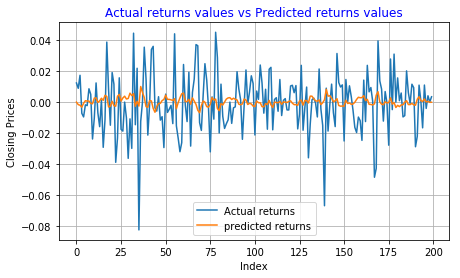

([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,

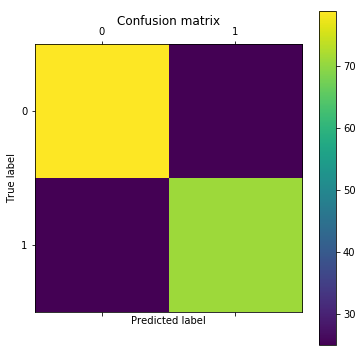

In [23]:
netcareTrain1=returns[0:700]
netcareTest1=returns[700:900]
history=[x for x in netcareTrain1]
test_predicted=list()
for i in range(len(netcareTest1)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.161,-0.78],trend='nc',method='mle')
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=netcareTest1[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
netcareTest1=list(netcareTest1)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(netcareTest1,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
netcare_ARMA_ss_700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(netcareTest1)):
    if netcareTest1[t-1]>=netcareTest1[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)
Confusion_matrix(len(binary_test))

In [24]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  899
Model:                     ARMA(1, 1)   Log Likelihood                2395.619
Method:                           mle   S.D. of innovations              0.017
Date:                Thu, 10 May 2018   AIC                          -4785.238
Time:                        02:25:42   BIC                          -4770.834
Sample:                             0   HQIC                         -4779.735
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.4960      0.140      3.539      0.000       0.221       0.771
ma.L1.y       -0.6027      0.128     -4.727      0.000      -0.853      -0.353
                                    Roots           

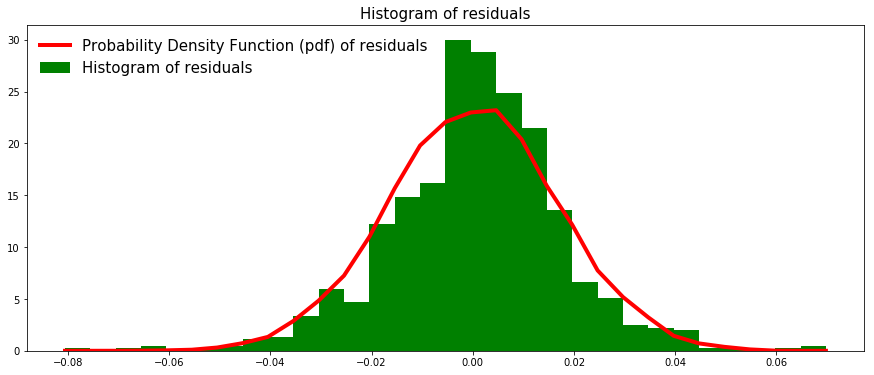

In [25]:
#Histogram and Probability density function of residuals 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

In [26]:
#Durbin-Watson statistic
#The null hypothesis of the test is that there is no serial correlation.
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

1.9797294409206283

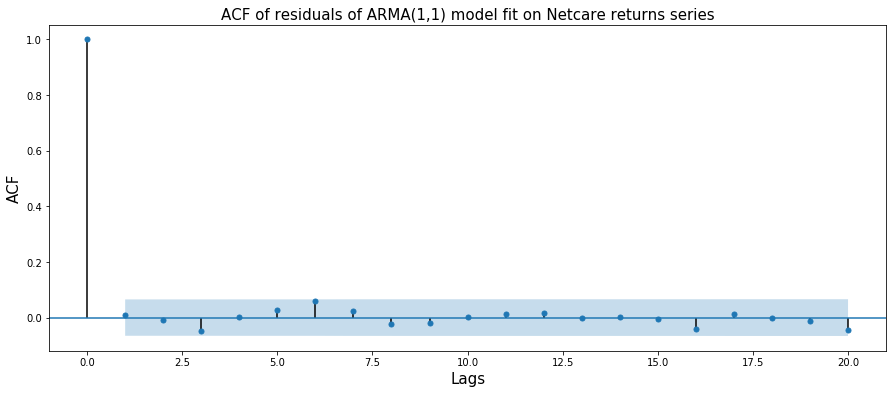

In [27]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import matplotlib.pylab as plt
plt.figure(figsize=(12,8))
sm.graphics.tsa.plot_acf(model.resid, lags=20)
plt.title("ACF of residuals of ARMA(1,1) model fit on Netcare returns series",fontsize=15)
plt.xlabel("Lags",fontsize=15)
plt.ylabel("ACF",fontsize=15)


In [28]:
'''
Ljung-Box test statistics

After identifying the potential time series model for the data, we apply the Ljung box test statistic to
the model residuals to determine if the choosen time series model is a good fit for the data



'''

from pandas import DataFrame
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,0.065107,0.798599
1,0.141211,0.931829
2,2.103878,0.551129
3,2.113217,0.714945
4,2.846214,0.723681
5,6.160940,0.405405
6,6.689417,0.461918
7,7.167868,0.518634
8,7.452494,0.590117


# Santam Ltd

Santam Ltd is an insurer covering general insurance and investment operations, as well as investments in emerging market insurance companies. The Company's segments include insurance, which includes core general insurance and reinsurance underwriting activities undertaken by the Company and are analyzed by insurance class; Investment, which includes all investment-related activities undertaken by the Company, and Strategic diversification, which relate to all strategic investing activities where the purpose of the activities is to obtain certain diversification benefits. The Company's business units include Santam Commercial and Personal, which offers business portfolio, multiproduct and multichannel distribution portfolio, and independent administration capability; Santam Specialist, which focuses on the insurance of risks in various market segments; MiWay, which is a direct insurer in the group, and Santam re, which is a wholesale reinsurance service provider

In [32]:
#load the data 
filename = 'snt.csv'
SantamTS = pd.read_csv(filename,na_filter=True,index_col="Date").dropna()
SantamTS.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
13/01/02,18950,19321,18950,18990.0,29044
13/01/03,19000,19001,18979,18990.0,7150
13/01/04,19000,19000,18482,18597.0,14707
13/01/07,19000,19000,18654,18850.0,7530
13/01/08,19000,19000,18736,19000.0,8986


In [33]:
print("The sample contains:", len(SantamTS),"observations")

('The sample contains:', 1177, 'observations')


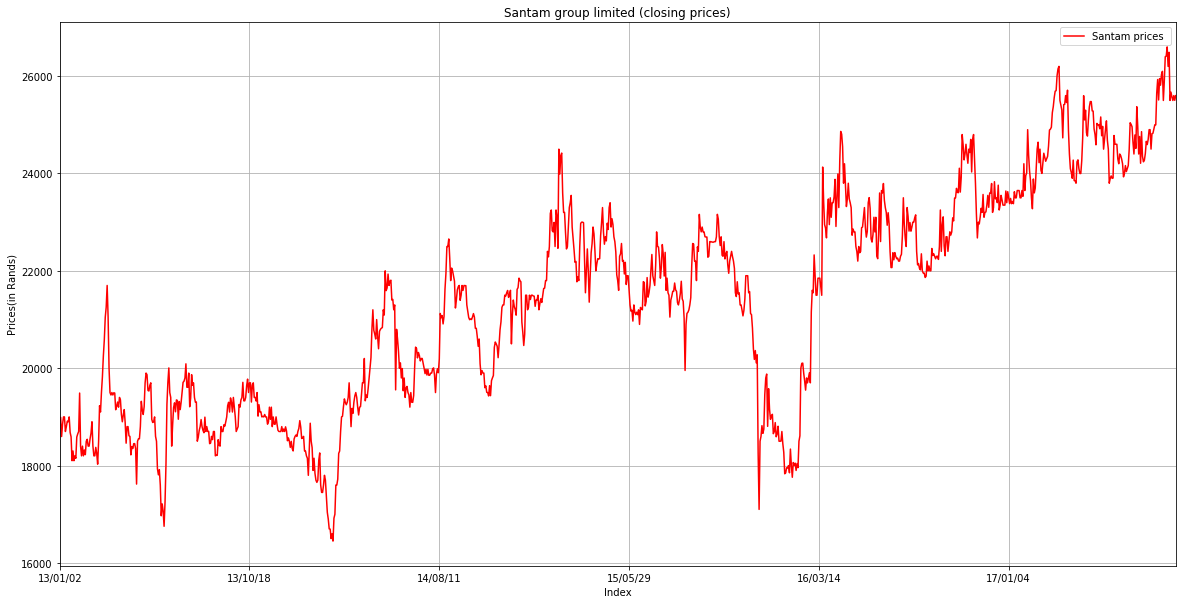

In [34]:
plt.figure(figsize=(20,10))
SantamTS["Close"].plot(label="Santam prices ",color="red")
plt.grid(True)
plt.title("Santam group limited (closing prices)",color="black")
plt.xlabel("Index")
plt.ylabel("Prices(in Rands)")
plt.legend(loc=1)

In [35]:
#The log-returns
returns=np.log((SantamTS["Close"])/(SantamTS["Close"].shift()))
returns.head(5)
returns=returns.dropna()

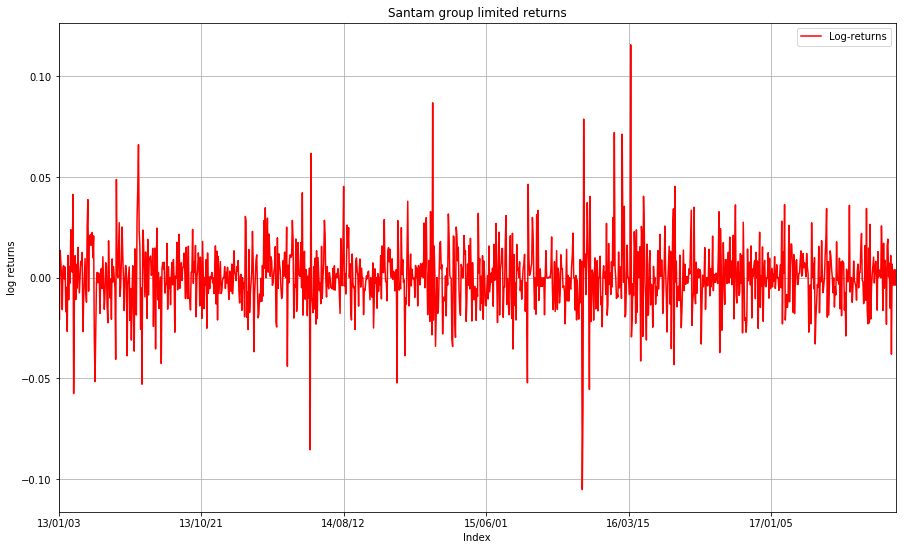

In [36]:
#print("The following plot shows the daily logged return of Netcare group limited")
plt.figure(figsize=(15,9))
returns.plot(label="Log-returns",color="red")
plt.grid(True)
plt.title("Santam group limited returns",color="black")
plt.xlabel("Index")
plt.ylabel("log returns")
plt.legend(loc=0)
plt.show()

In [37]:
#stationarity test for the returns series
#The number of lags can be directly set using lags.
#Changing the number of lags makes no difference to the conclusion
#The ADF assumes residuals are white noise, and that the number of lags is sufficient, 
#to pick up any dependence  in the data.

from arch.unitroot import ADF
adf = ADF(returns)
adf.lags = 15
print(adf.summary().as_text())
print('The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary')


   Augmented Dickey-Fuller Results   
Test Statistic                 -9.272
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary


#### split1: Train 500  Test:200

In [38]:
SantamTrain=returns[0:500]
SantamTest=returns[500:700]

In [39]:
import pandas as pd
from  pandas import Series
history=[x for x in SantamTrain]
test_predicted=list()
for i in range(len(SantamTest)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.0161,-0.78],trend='nc',method='mle')
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=SantamTest[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
SantamTest=list(SantamTest)

Test=-0.009778, Predicted=0.000094
Test=0.006046, Predicted=0.000404
Test=0.000000, Predicted=-0.000536
Test=0.004662, Predicted=0.000323
Test=-0.014052, Predicted=-0.000418
Test=0.005973, Predicted=0.000932
Test=0.004725, Predicted=-0.000861
Test=-0.003600, Predicted=0.000286
Test=0.006954, Predicted=0.000010
Test=0.006398, Predicted=-0.000357
Test=0.000323, Predicted=-0.000105
Test=0.007135, Predicted=0.000047
Test=0.000046, Predicted=-0.000373
Test=0.027105, Predicted=0.000220
Test=-0.005057, Predicted=-0.001448
Test=0.009512, Predicted=0.001130
Test=0.029775, Predicted=-0.001173
Test=0.003015, Predicted=-0.000878
Test=-0.018449, Predicted=0.000319
Test=-0.001096, Predicted=0.000661
Test=0.008516, Predicted=-0.000354
Test=-0.021761, Predicted=-0.000172
Test=0.032790, Predicted=0.001157
Test=-0.005953, Predicted=-0.002470
Test=-0.028438, Predicted=0.001451
Test=0.086759, Predicted=0.001474
Test=-0.021078, Predicted=-0.007048
Test=0.015716, Predicted=0.002573
Test=0.002050, Predicted=

/home/vhahangwele/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test=0.000675, Predicted=0.000262
Test=-0.012684, Predicted=0.000227
Test=0.010882, Predicted=0.000762
Test=-0.020732, Predicted=0.000283
Test=0.008253, Predicted=0.001160
Test=0.000000, Predicted=0.000787
Test=-0.013793, Predicted=0.000769
Test=-0.013986, Predicted=0.001333
Test=-0.005980, Predicted=0.001869
Test=0.000897, Predicted=0.002057
Test=-0.010626, Predicted=0.001972
Test=0.015710, Predicted=0.002331
Test=-0.007067, Predicted=0.001673
Test=-0.002272, Predicted=0.001916
Test=0.002272, Predicted=0.001961
Test=-0.002367, Predicted=0.001826
Test=0.004681, Predicted=0.001878
Test=-0.014205, Predicted=0.001651
Test=0.016514, Predicted=0.002173
Test=-0.001319, Predicted=0.001480
Test=-0.000943, Predicted=0.001501
Test=0.026899, Predicted=0.001507
Test=-0.000827, Predicted=0.000358
Test=-0.022306, Predicted=0.000386
Test=0.004408, Predicted=0.001327
Test=0.022575, Predicted=0.001115
Test=-0.018559, Predicted=0.000128
Test=0.004185, Predicted=0.000929
Test=0.006936, Predicted=0.000730

In [40]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  699
Model:                     ARMA(1, 1)   Log Likelihood                1916.673
Method:                           mle   S.D. of innovations              0.016
Date:                Thu, 10 May 2018   AIC                          -3827.346
Time:                        02:27:43   BIC                          -3813.697
Sample:                             0   HQIC                         -3822.069
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9308      0.022     42.562      0.000       0.888       0.974
ma.L1.y       -0.9789      0.011    -85.806      0.000      -1.001      -0.957
                                    Roots           

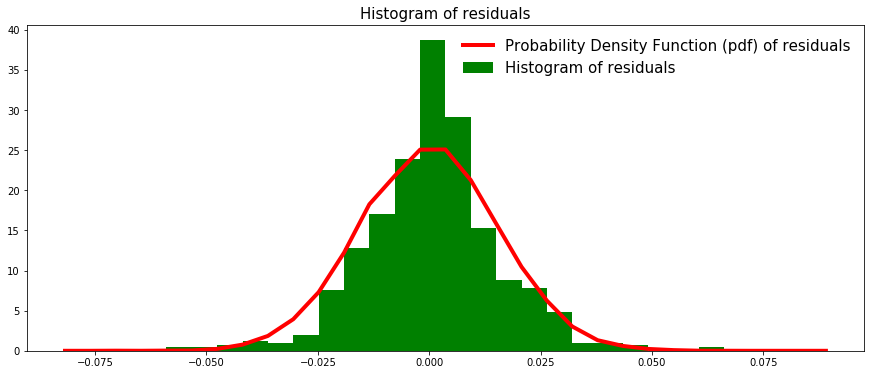

In [41]:
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

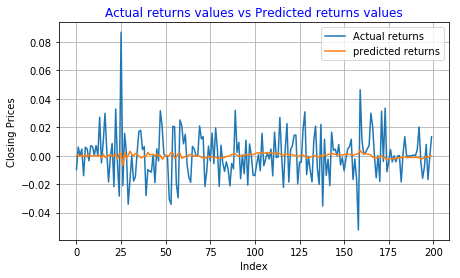

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(SantamTest,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()

In [43]:
#Durbin Watson Test
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

2.0881957078177535

In [44]:
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,1.520764,0.217504
1,2.146535,0.341890
2,2.569743,0.462819
3,2.696978,0.609743
4,3.279180,0.657031
5,3.456890,0.749696
6,3.462201,0.839213
7,3.705789,0.882645
8,3.776820,0.925478


In [45]:
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
santam_ARMA_ss_500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(SantamTest)):
    if SantamTest[t-1]>=SantamTest[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)


([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 200)
Predicted data:
([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,

65.0
[[60 41]
 [29 70]]


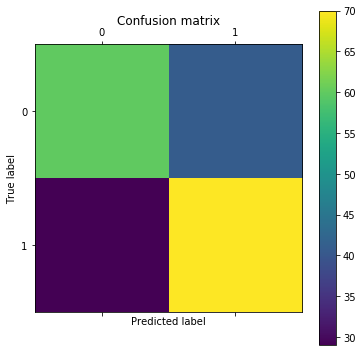

In [46]:
Confusion_matrix(len(SantamTest))

#### split2: Train 700  Test:200

Test=-0.015833, Predicted=-0.000949
Test=0.004709, Predicted=-0.000170
Test=0.002235, Predicted=-0.000392
Test=-0.012579, Predicted=-0.000491
Test=-0.007715, Predicted=0.000124
Test=0.011325, Predicted=0.000492
Test=0.004494, Predicted=-0.000062
Test=0.004474, Predicted=-0.000278
Test=-0.004923, Predicted=-0.000488
Test=-0.004046, Predicted=-0.000240
Test=-0.006780, Predicted=-0.000039
Test=-0.022937, Predicted=0.000288
Test=-0.003626, Predicted=0.001381
Test=0.014059, Predicted=0.001521
Test=-0.011547, Predicted=0.000824
Test=0.001114, Predicted=0.001357
Test=-0.011669, Predicted=0.001275
Test=0.000000, Predicted=0.001796
Test=-0.004942, Predicted=0.001756
Test=-0.005678, Predicted=0.001946
Test=0.005395, Predicted=0.002162
Test=0.010890, Predicted=0.001869
Test=0.022115, Predicted=0.001324
Test=0.000000, Predicted=0.000243
Test=0.000000, Predicted=0.000238
Test=-0.016111, Predicted=0.000233
Test=0.001067, Predicted=0.001005
Test=-0.021033, Predicted=0.000933
Test=-0.001137, Predicted

/home/vhahangwele/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test=-0.002317, Predicted=-0.002524
Test=0.035421, Predicted=-0.002405
Test=-0.019493, Predicted=-0.003022
Test=-0.018251, Predicted=-0.002601
Test=0.000000, Predicted=-0.002151
Test=0.016102, Predicted=-0.002098
Test=0.000046, Predicted=-0.002426
Test=0.000000, Predicted=-0.002370
Test=-0.008411, Predicted=-0.002316
Test=-0.007830, Predicted=-0.002065
Test=0.115579, Predicted=-0.001823
Test=-0.029436, Predicted=-0.006258
Test=-0.020785, Predicted=-0.003170
Test=-0.003055, Predicted=-0.001075
Test=-0.008868, Predicted=-0.000612
Test=0.022757, Predicted=0.000037
Test=0.011826, Predicted=-0.001360
Test=-0.022661, Predicted=-0.001749
Test=0.023682, Predicted=0.000261
Test=-0.017168, Predicted=-0.001411
Test=0.012903, Predicted=0.000234
Test=0.000000, Predicted=-0.000750
Test=0.004988, Predicted=-0.000512
Test=0.015318, Predicted=-0.000709
Test=-0.041380, Predicted=-0.001585
Test=0.025425, Predicted=0.001973
Test=0.020552, Predicted=-0.000591
Test=-0.029184, Predicted=-0.001981
Test=0.0403

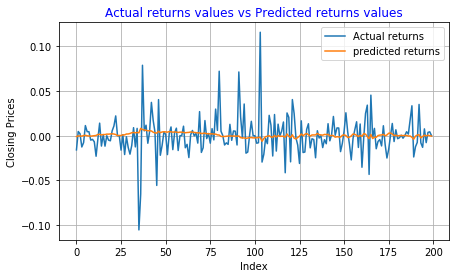

([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0], 200)
Predicted data:
([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

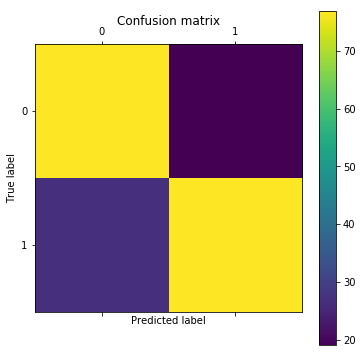

In [47]:
SantamTrain=returns[0:700]
SantamTest=returns[700:900]
history=[x for x in SantamTrain]
test_predicted=list()
for i in range(len(SantamTest)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.161,-0.78],trend='nc',method='mle')
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=SantamTest[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
SantamTest=list(SantamTest)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(SantamTest,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
santam_ARMA_ss_700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(SantamTest)):
    if SantamTest[t-1]>=SantamTest[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)
Confusion_matrix(len(SantamTest))






In [48]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  899
Model:                     ARMA(1, 1)   Log Likelihood                2380.279
Method:                           mle   S.D. of innovations              0.017
Date:                Thu, 10 May 2018   AIC                          -4754.559
Time:                        02:29:38   BIC                          -4740.155
Sample:                             0   HQIC                         -4749.056
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5427      0.282      1.923      0.055      -0.010       1.096
ma.L1.y       -0.6330      0.261     -2.423      0.016      -1.145      -0.121
                                    Roots           

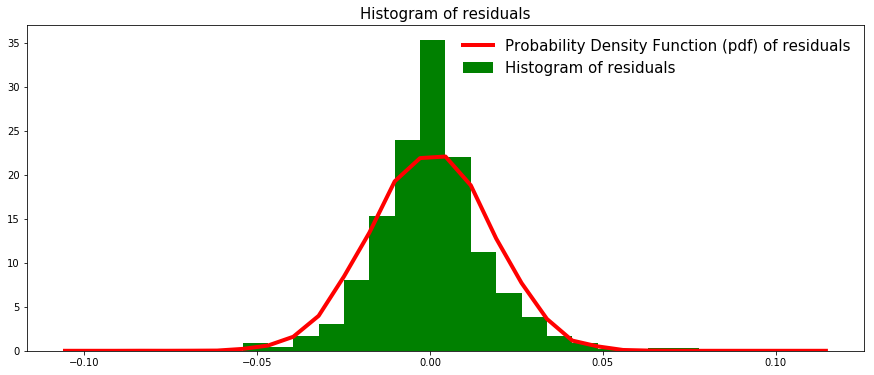

In [49]:
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

In [50]:
#Durbin Watson Test
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

2.0136607890101956

In [51]:
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,0.045499,0.831090
1,0.081673,0.959986
2,0.605646,0.895139
3,1.075377,0.898159
4,1.097571,0.954318
5,1.148571,0.979349
6,3.024225,0.882752
7,3.285398,0.915192
8,3.316971,0.950392


# Sanlam

Sanlam Limited is a South Africa-based holding company. The Company provides financial solutions to individuals and institutional clients through a network of channels and partnerships in approximately 50 countries. The Company operates through six segments: Sanlam Personal Finance, which is responsible for retail business in South Africa; Sanlam Emerging Markets, which includes general insurance and investment management; Sanlam Investments, which includes Investment Management and Capital Management; Sanlam Corporate, which includes Sanlam Employee Benefits and Sanlam Health Management; Santam, which provides a range of general insurance products and services, and Group office and Other. Its solutions include Life insurance, general insurance, investment management (including retail savings, asset management and wealth management), credit and structuring, and administration health and other (such as estate planning, trusts, wills, and lending and health management). 

In [52]:
#load the data set
filename = 'slm.csv'
SanlamTS = pd.read_csv(filename,na_filter=True,index_col="Date").dropna()
SanlamTS.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
13/01/02,4520.0,4550,4509,4545,2035263
13/01/03,4550.0,4558,4516,4549,1488016
13/01/04,4512.0,4600,4512,4598,1498258
13/01/07,4600.0,4640,4568,4609,1705254
13/01/08,4625.0,4631,4601,4631,1989724


In [53]:
print("The sample contains:", len(SanlamTS),"observations")

('The sample contains:', 1177, 'observations')


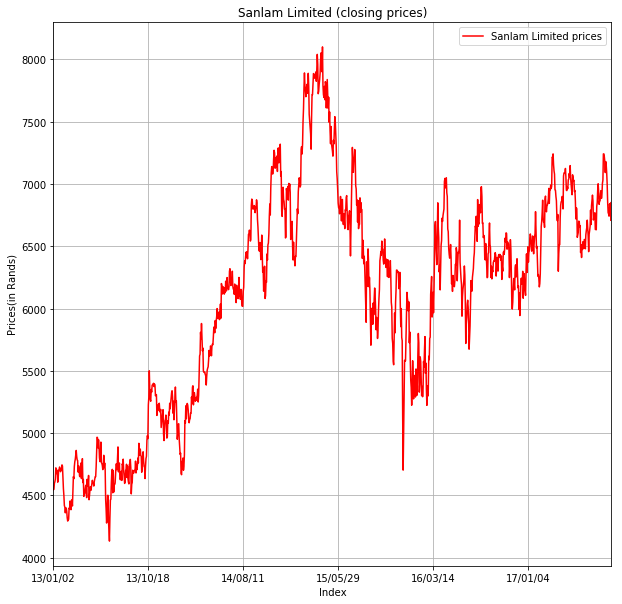

In [54]:
plt.figure(figsize=(10,10))
SanlamTS["Close"].plot(label="Sanlam Limited prices",color="red")
plt.grid(True)
plt.title("Sanlam Limited (closing prices)",color="black")
plt.xlabel("Index")
plt.ylabel("Prices(in Rands)")
plt.legend(loc=1)

In [56]:
#The log-returns
returns=np.log((SanlamTS["Close"])/(SanlamTS["Close"].shift()))
returns.head(5)
returns=returns.dropna()

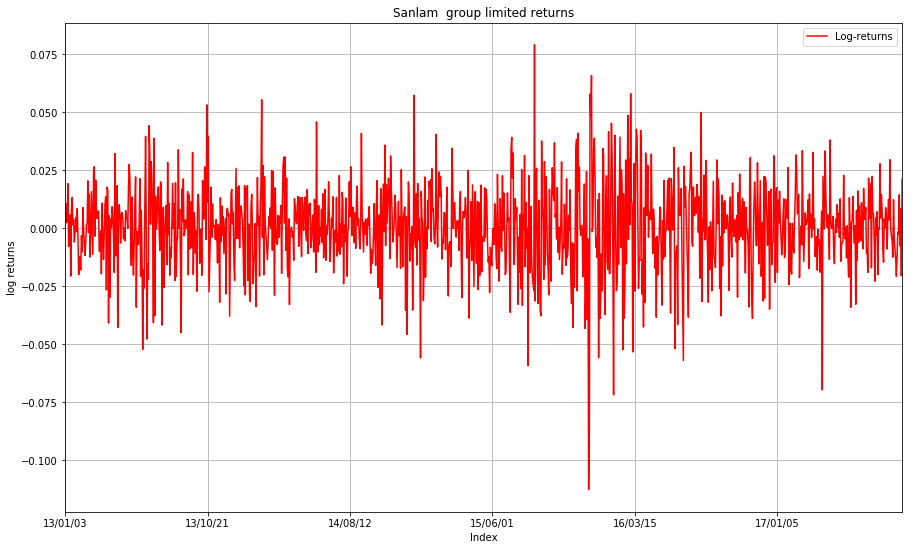

In [57]:
plt.figure(figsize=(15,9))
returns.plot(label="Log-returns",color="red")
plt.grid(True)
plt.title("Sanlam  group limited returns",color="black")
plt.xlabel("Index")
plt.ylabel("log returns")
plt.legend(loc=0)
plt.show()

In [58]:
#stationarity test for the returns series
#The number of lags can be directly set using lags.
#Changing the number of lags makes no difference to the conclusion
#The ADF assumes residuals are white noise, and that the number of lags is sufficient, 
#to pick up any dependence  in the data.

from arch.unitroot import ADF
adf = ADF(returns)
adf.lags = 15
print(adf.summary().as_text())
print('The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary')


   Augmented Dickey-Fuller Results   
Test Statistic                 -9.694
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary


#### split1: Train 500  Test:200

In [59]:
SanlamTrain=returns[0:500]
SanlamTest=returns[500:700]

In [60]:
history=[x for x in SanlamTrain]
test_predicted=list()
for i in range(len(SanlamTest)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.161,-0.78],trend='nc',method='mle')
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=SanlamTest[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
SanlamTest=list(SanlamTest)

Test=0.015891, Predicted=0.005303
Test=0.004494, Predicted=-0.001333
Test=0.001494, Predicted=-0.000545
Test=-0.031229, Predicted=-0.000201
Test=-0.016144, Predicted=0.003059
Test=0.022132, Predicted=0.002033
Test=-0.021193, Predicted=-0.001440
Test=0.000469, Predicted=0.001796
Test=-0.008790, Predicted=0.000281
Test=0.012066, Predicted=0.000917
Test=-0.000312, Predicted=-0.001061
Test=0.020206, Predicted=-0.000147
Test=0.016807, Predicted=-0.002048
Test=0.020950, Predicted=-0.001883
Test=-0.005751, Predicted=-0.002038
Test=0.025695, Predicted=0.000454
Test=0.007467, Predicted=-0.002471
Test=0.008547, Predicted=-0.000665
Test=-0.003837, Predicted=-0.000774
Test=-0.006715, Predicted=0.000387
Test=0.002005, Predicted=0.000614
Test=0.040513, Predicted=-0.000206
Test=0.002881, Predicted=-0.003766
Test=-0.008115, Predicted=-0.000229
Test=0.010851, Predicted=0.000731
Test=0.024293, Predicted=-0.000980
Test=0.013640, Predicted=-0.002235
Test=0.022371, Predicted=-0.001240
Test=0.014936, Predic

/home/vhahangwele/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test=-0.008502, Predicted=-0.000647
Test=0.000147, Predicted=0.000471
Test=-0.059273, Predicted=0.000095
Test=0.022698, Predicted=0.004317
Test=-0.010282, Predicted=-0.001037
Test=-0.019155, Predicted=0.000720
Test=0.009390, Predicted=0.001583
Test=-0.014118, Predicted=-0.000576
Test=-0.021235, Predicted=0.001088
Test=-0.024007, Predicted=0.001770
Test=-0.026802, Predicted=0.001906
Test=0.079128, Predicted=0.001897
Test=-0.031389, Predicted=-0.005908
Test=0.021775, Predicted=0.002094
Test=0.025797, Predicted=-0.002115
Test=-0.015555, Predicted=-0.002518
Test=-0.032502, Predicted=0.001320
Test=0.012073, Predicted=0.003191
Test=-0.017594, Predicted=-0.000684
Test=-0.035638, Predicted=0.001605
Test=-0.037831, Predicted=0.003474
Test=0.037662, Predicted=0.003409
Test=0.009909, Predicted=-0.002826
Test=0.003503, Predicted=-0.001408
Test=-0.022057, Predicted=-0.000593
Test=0.028696, Predicted=0.001825
Test=-0.015840, Predicted=-0.002267
Test=0.022271, Predicted=0.001065
Test=0.013226, Predic

In [61]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  699
Model:                     ARMA(1, 1)   Log Likelihood                1860.581
Method:                           mle   S.D. of innovations              0.017
Date:                Thu, 10 May 2018   AIC                          -3715.161
Time:                        02:30:34   BIC                          -3701.512
Sample:                             0   HQIC                         -3709.885
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.0399      0.478      0.083      0.934      -0.898       0.978
ma.L1.y       -0.1278      0.475     -0.269      0.788      -1.059       0.803
                                    Roots           

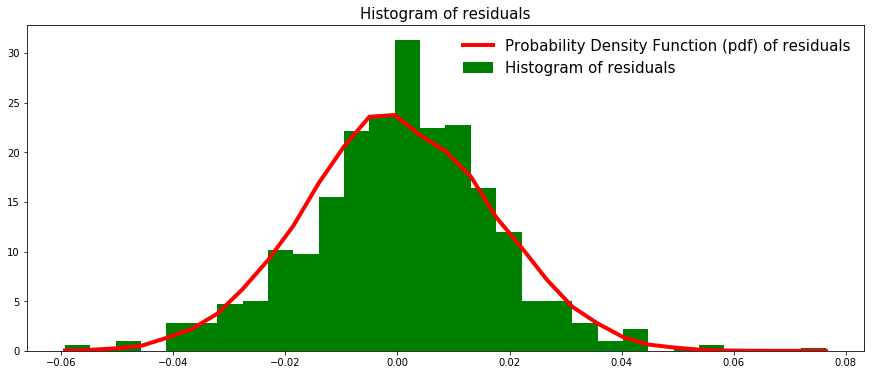

In [62]:
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

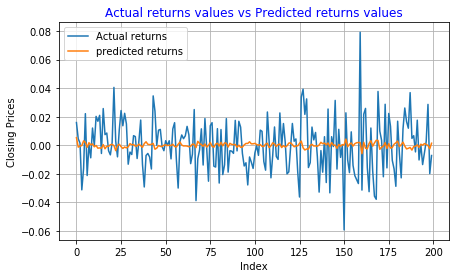

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(SanlamTest,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()

In [64]:
#Durbin Watson Test
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

1.998810382008811

In [65]:
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,0.001119,0.973317
1,0.001125,0.999438
2,0.023420,0.999053
3,0.126179,0.998092
4,0.722429,0.981715
5,2.620384,0.854759
6,2.929148,0.891478
7,3.106994,0.927465
8,10.134120,0.339737


In [66]:
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
sanlam_ARMA_ss_500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(SanlamTest)):
    if SanlamTest[t-1]>=SanlamTest[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)

([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1], 200)
Predicted data:
([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,

68.0
[[68 39]
 [25 68]]


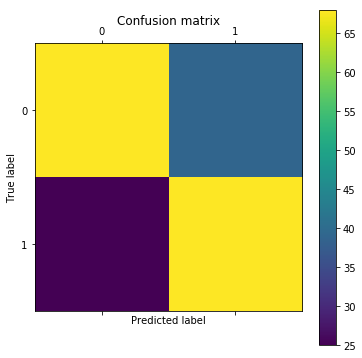

In [67]:
Confusion_matrix(len(SanlamTest))

#### split2: Train 700  Test:200

Test=-0.008495, Predicted=0.000825
Test=0.010373, Predicted=0.000850
Test=-0.006116, Predicted=-0.000780
Test=-0.016016, Predicted=0.000424
Test=0.021350, Predicted=0.001457
Test=-0.012755, Predicted=-0.001666
Test=-0.009554, Predicted=0.000907
Test=0.005584, Predicted=0.000986
Test=-0.000796, Predicted=-0.000348
Test=0.016582, Predicted=0.000018
Test=-0.021370, Predicted=-0.001481
Test=-0.032523, Predicted=0.001722
Test=-0.006301, Predicted=0.003157
Test=-0.042820, Predicted=0.001106
Test=-0.006794, Predicted=0.003660
Test=-0.025493, Predicted=0.000793
Test=-0.005033, Predicted=0.002055
Test=0.033841, Predicted=0.000391
Test=0.038282, Predicted=-0.002715
Test=-0.027022, Predicted=-0.003004
Test=0.041008, Predicted=0.001728
Test=0.015911, Predicted=-0.003382
Test=0.026338, Predicted=-0.001402
Test=0.000000, Predicted=-0.002016
Test=-0.003016, Predicted=0.000043
Test=0.001271, Predicted=0.000232
Test=-0.001271, Predicted=-0.000102
Test=-0.020884, Predicted=0.000100
Test=0.001946, Predic

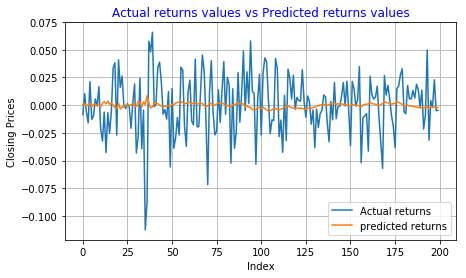

([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1], 200)
Predicted data:
([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,

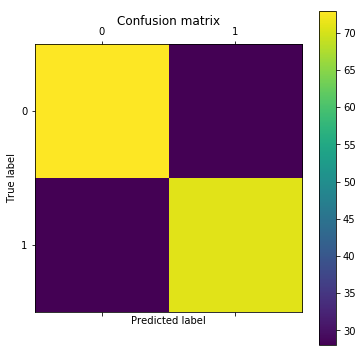

In [68]:
SanlamTrain=returns[0:700]
SanlamTest=returns[700:900]
history=[x for x in SanlamTrain]
test_predicted=list()
for i in range(len(SanlamTest)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.161,-0.78],trend='nc',method='mle')
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=SanlamTest[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
SanlamTest=list(SanlamTest)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(SanlamTest,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
sanlam_ARMA_ss_700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(SanlamTest)):
    if SanlamTest[t-1]>=SanlamTest[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)
Confusion_matrix(len(SanlamTest))



In [69]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  899
Model:                     ARMA(1, 1)   Log Likelihood                2263.081
Method:                           mle   S.D. of innovations              0.020
Date:                Thu, 10 May 2018   AIC                          -4520.161
Time:                        02:31:58   BIC                          -4505.757
Sample:                             0   HQIC                         -4514.658
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9181      0.038     24.036      0.000       0.843       0.993
ma.L1.y       -0.9529      0.029    -33.301      0.000      -1.009      -0.897
                                    Roots           

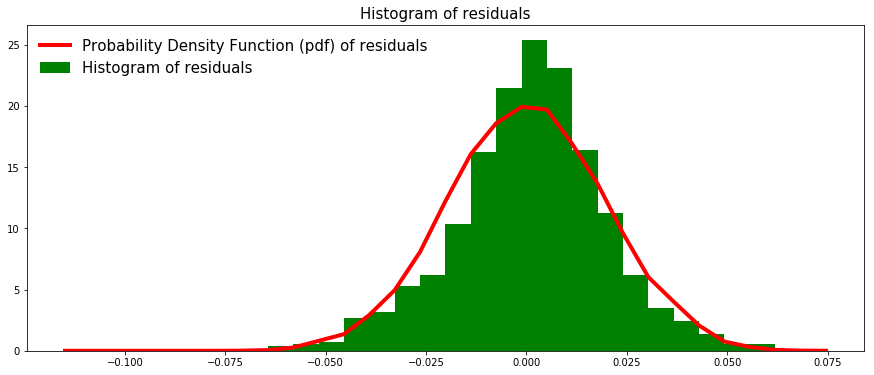

In [70]:
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

In [71]:
#Durbin Watson Test
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

1.96900624002513

In [72]:
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,0.179936,0.671428
1,0.198015,0.905736
2,0.277031,0.964289
3,0.495447,0.973943
4,1.146791,0.949879
5,1.757771,0.940575
6,1.822606,0.969003
7,1.952740,0.982427
8,7.618872,0.572963


# Nedbank Group Ltd

Nedbank is one of the largest banks in South Africa; however, it is one of the newest banks to be incorporated. It is headquartered in Johannesburg. Market capitalization was ZAR:120 billion (approximately US$9.85 billion), as of 30 June 2015.

In [73]:
#load the data 
filename = 'ned.csv'
nedbankTS = pd.read_csv(filename,na_filter=True,index_col="Date").dropna()
nedbankTS.head(5)


,Open,High,Low,Close,Volume
Date,,,,,
13/01/02,18888,19001,18755,18975,292269
13/01/03,19000,19001,18741,18947,182826
13/01/04,19000,19000,18750,18832,191315
13/01/07,19079,19184,18818,19025,296281
13/01/08,19010,19159,18806,18977,241453


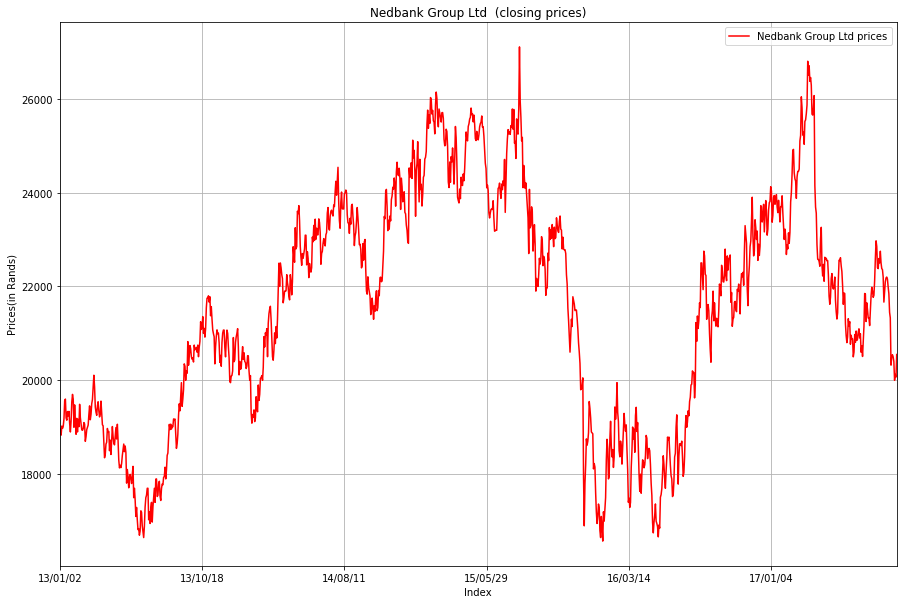

In [74]:
plt.figure(figsize=(15,10))
nedbankTS["Close"].plot(label="Nedbank Group Ltd prices",color="red")
plt.grid(True)
plt.title("Nedbank Group Ltd  (closing prices)",color="black")
plt.xlabel("Index")
plt.ylabel("Prices(in Rands)")
plt.legend(loc=1)

In [75]:
#The log-returns
returns=np.log((nedbankTS["Close"])/(nedbankTS["Close"].shift()))
returns.head(5)
returns=returns.dropna()

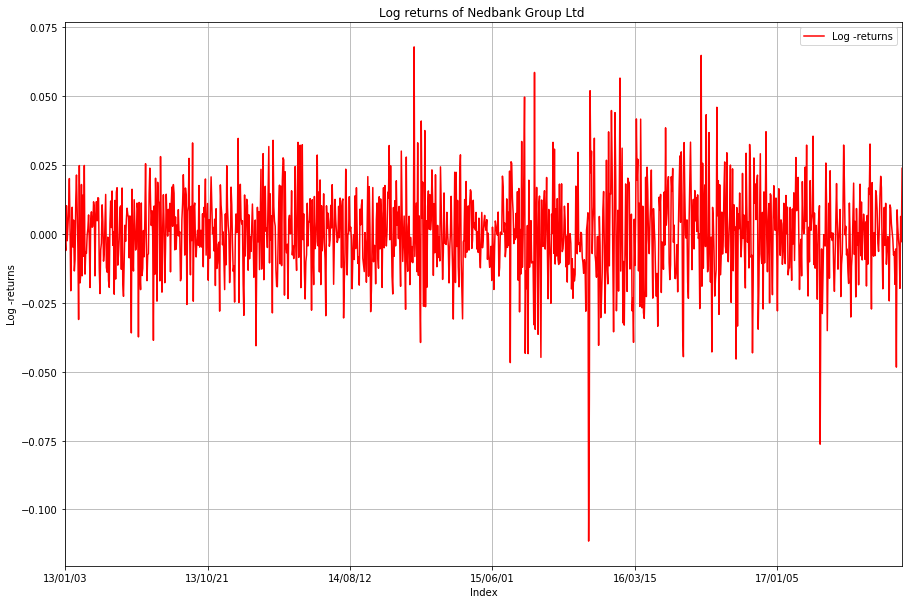

In [76]:
plt.figure(figsize=(15,10))
returns.plot(label="Log -returns",color="red")
plt.grid(True)
plt.title("Log returns of Nedbank Group Ltd ",color="black")
plt.xlabel("Index")
plt.ylabel("Log -returns")
plt.legend(loc=1)

In [77]:
#stationarity test for the returns series
#The number of lags can be directly set using lags.
#Changing the number of lags makes no difference to the conclusion
#The ADF assumes residuals are white noise, and that the number of lags is sufficient, 
#to pick up any dependence  in the data.

from arch.unitroot import ADF
adf = ADF(returns)
adf.lags = 15
print(adf.summary().as_text())
print('The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary')


   Augmented Dickey-Fuller Results   
Test Statistic                 -8.738
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary


In [78]:
#stationarity test for the returns series
#The number of lags can be directly set using lags.
#Changing the number of lags makes no difference to the conclusion
#The ADF assumes residuals are white noise, and that the number of lags is sufficient, 
#to pick up any dependence  in the data.

from arch.unitroot import ADF
adf = ADF(returns)
adf.lags = 15
print(adf.summary().as_text())
print('The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary')


   Augmented Dickey-Fuller Results   
Test Statistic                 -8.738
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
The ADF test statistic value is less than the critical region and p-value is also less than 0.05 significance level.So we  reject the null hypothesis of non-stationarity of the series and conclude that the returns series is stationary


#### split1: Train 500  Test:200

In [79]:
nedbankTrain=returns[0:500]
nedbankTest=returns[500:700]

In [80]:
history=[x for x in nedbankTrain]
test_predicted=list()
for i in range(len(nedbankTest)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.161,-0.78],trend='nc',method='mle')
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=nedbankTest[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
nedbankTest=list(nedbankTest)

Test=0.040905, Predicted=0.005686
Test=0.005744, Predicted=-0.001284
Test=0.018753, Predicted=-0.001690
Test=-0.026256, Predicted=-0.003756
Test=-0.026249, Predicted=0.001054
Test=0.037441, Predicted=0.004385
Test=-0.026452, Predicted=-0.002342
Test=0.004685, Predicted=0.002393
Test=-0.019379, Predicted=0.000918
Test=0.009987, Predicted=0.003586
Test=0.015536, Predicted=0.000918
Test=0.001684, Predicted=-0.001748
Test=0.014222, Predicted=-0.001452
Test=0.001415, Predicted=-0.003155
Test=0.004998, Predicted=-0.002383
Test=0.023168, Predicted=-0.002389
Test=0.011638, Predicted=-0.005040
Test=-0.015101, Predicted=-0.005035
Test=0.010938, Predicted=-0.001308
Test=-0.006886, Predicted=-0.002424
Test=0.021401, Predicted=-0.000646
Test=-0.001615, Predicted=-0.003537
Test=-0.011965, Predicted=-0.002100
Test=0.003034, Predicted=0.000349
Test=-0.008580, Predicted=-0.000211
Test=-0.001176, Predicted=0.001127
Test=-0.009852, Predicted=0.000928
Test=0.024258, Predicted=0.002078
Test=0.010383, Predi

In [81]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  699
Model:                     ARMA(1, 1)   Log Likelihood                1969.662
Method:                           mle   S.D. of innovations              0.014
Date:                Thu, 10 May 2018   AIC                          -3933.324
Time:                        02:32:48   BIC                          -3919.675
Sample:                             0   HQIC                         -3928.047
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.4345      0.160      2.710      0.007       0.120       0.749
ma.L1.y       -0.5993      0.143     -4.195      0.000      -0.879      -0.319
                                    Roots           

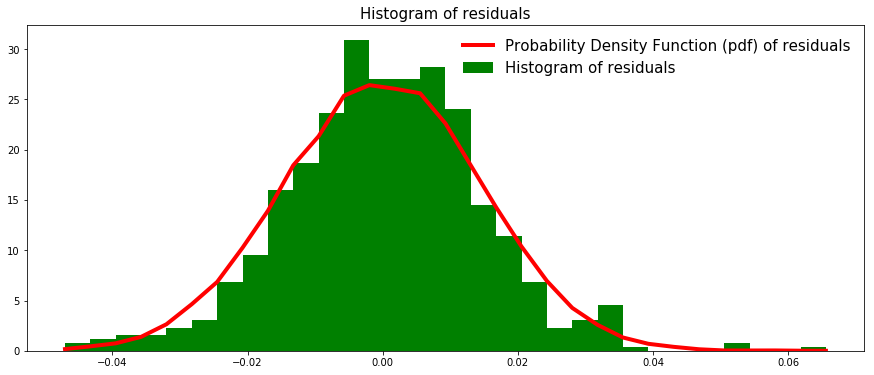

In [82]:
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

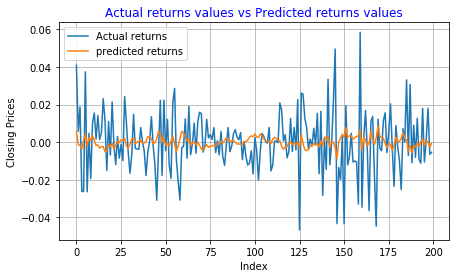

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(nedbankTest,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()

In [84]:
#Durbin Watson Test
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

2.0105476588780564

In [85]:
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,0.026676,0.870261
1,0.088886,0.956530
2,0.220184,0.974267
3,0.243971,0.993138
4,2.529251,0.772084
5,2.769978,0.837114
6,6.142766,0.523182
7,6.369016,0.605970
8,10.157834,0.337859


In [86]:
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
nedbank_ARMA_ss_500=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(nedbankTest)):
    if nedbankTest[t-1]>=nedbankTest[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)

([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1], 200)
Predicted data:
([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,

73.5
[[73 28]
 [25 74]]


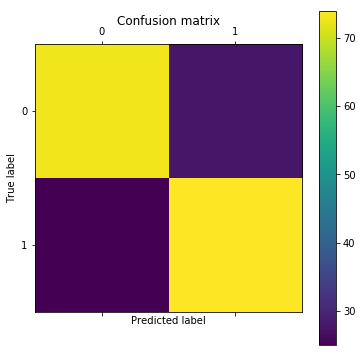

In [87]:
Confusion_matrix(len(nedbankTest))

#### split2: Train 700  Test:200

Test=-0.001468, Predicted=0.000508
Test=0.010014, Predicted=0.000546
Test=0.004991, Predicted=-0.001324
Test=-0.011986, Predicted=-0.001615
Test=-0.000862, Predicted=0.001007
Test=-0.017523, Predicted=0.000746
Test=0.010993, Predicted=0.003330
Test=-0.011125, Predicted=0.000196
Test=-0.000614, Predicted=0.001953
Test=0.000044, Predicted=0.001267
Test=-0.003562, Predicted=0.000749
Test=-0.020023, Predicted=0.001034
Test=-0.009029, Predicted=0.003912
Test=-0.023401, Predicted=0.003766
Test=-0.012755, Predicted=0.005895
Test=-0.017120, Predicted=0.005304
Test=-0.014745, Predicted=0.005456
Test=0.017277, Predicted=0.005009
Test=0.016139, Predicted=0.000193
Test=-0.007256, Predicted=-0.002182
Test=0.029541, Predicted=-0.000159
Test=-0.003864, Predicted=-0.004578
Test=-0.003278, Predicted=-0.002050
Test=-0.006495, Predicted=-0.000686
Test=0.000512, Predicted=0.000581
Test=0.000047, Predicted=0.000259
Test=-0.008409, Predicted=0.000144
Test=-0.010469, Predicted=0.001360
Test=-0.014323, Predic

/home/vhahangwele/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test=0.017708, Predicted=-0.002380
Test=-0.004630, Predicted=-0.003123


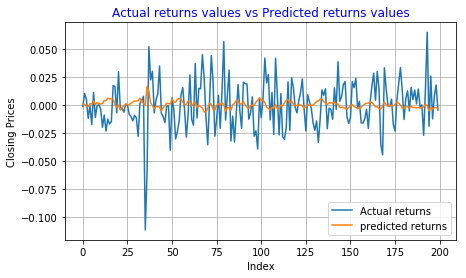

([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], 200)
Predicted data:
([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,

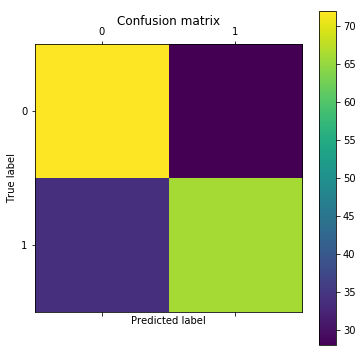

In [88]:
nedbankTrain=returns[0:700]
nedbankTest=returns[700:900]
history=[x for x in nedbankTrain]
test_predicted=list()
for i in range(len(nedbankTest)):
    model=smt.ARIMA(history,order=(1,0,1)).fit(start_params=[-0.161,-0.78],trend='nc',method='mle')
    output=model.forecast()
    yhat=output[0]
    test_predicted.append(yhat)
    obs=nedbankTest[i]
    history.append(obs)
    AbsoluteError=(np.abs(obs-yhat))
    ForecastError=(obs-yhat)
    print ('Test=%f, Predicted=%f' % (obs,yhat))
nedbankTest=list(nedbankTest)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(nedbankTest,label="Actual returns")
plt.plot(test_predicted,label="predicted returns")
plt.grid(True)
plt.title("Actual returns values vs Predicted returns values",color="blue")
plt.xlabel("Index")
plt.ylabel("Closing Prices")
plt.legend(loc=0)
plt.show()
binary_predicted_test=[]
for t in range(0,len(test_predicted)):
    if test_predicted[t-1]>=test_predicted[t]:
        binary_predicted_test.append(0)
    else:
        binary_predicted_test.append(1)
print(binary_predicted_test,len(binary_predicted_test))
nedbank_ARMA_ss_700=np.array(binary_predicted_test)
print("Predicted data:")
#convert normalised (testing)data to binary 0 or 1
binary_test=[]
for t in range(0,len(nedbankTest)):
    if nedbankTest[t-1]>=nedbankTest[t]:
        binary_test.append(0)
    else:
        binary_test.append(1)
print(binary_test,len(binary_test))
len(binary_test),len(binary_predicted_test),type(binary_test)
#we count the number of correct predictions, if i-j==0 then we predicted the direction correclty
def counter(x,y):
    count=0   
    for (i,j) in zip(x,y):
        if i-j==0:
            count=count+1
    print "The number of correct direction predictions is:",count,"out of:",len(x),"data points"
counter(binary_test,binary_predicted_test)
Confusion_matrix(len(nedbankTest))

In [89]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  899
Model:                     ARMA(1, 1)   Log Likelihood                2421.639
Method:                           mle   S.D. of innovations              0.016
Date:                Thu, 10 May 2018   AIC                          -4837.277
Time:                        02:34:00   BIC                          -4822.873
Sample:                             0   HQIC                         -4831.775
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7116      0.108      6.575      0.000       0.499       0.924
ma.L1.y       -0.7859      0.095     -8.317      0.000      -0.971      -0.601
                                    Roots           

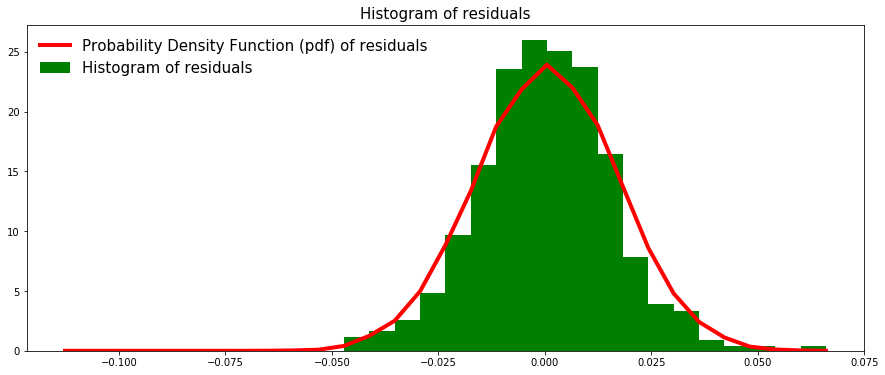

In [90]:
residuals=model.resid
residuals = DataFrame(residuals)
fig, ax = plt.subplots(1, 1)
noise = np.random.normal(0,np.std(residuals),10000)
density = stats.gaussian_kde(noise)
n, x, _ = ax.hist(residuals, bins=30, 
                   histtype='bar', normed=True,color="green",label="Histogram of residuals")  
ax.plot(x, density(x),linewidth=4,color="red",label="Probability Density Function (pdf) of residuals")
ax.legend(loc='best', frameon=False,fontsize=15)
plt.title("Histogram of residuals",fontsize=15)
plt.show()

In [91]:
#Durbin Watson Test
statsmodels.stats.stattools.durbin_watson(model.resid, axis=0)

1.958743922612624

In [92]:
residuals = DataFrame(model.resid)
import statsmodels
ljung=statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=21, boxpierce=False)
ljung
'''
Ljung box test of autocorrelation in the residuals.
 We apply the test to the residuals of the fitted ARIMA model.
 
 H0: No autocorrelation( at each lag time series data are independent and identically ditributed(iid))
 H1:autocorrelation in the residuals (serial correlations exists)

Decision Rule:
if p-value<0.05(significance level) we reject the null hypothesis of no autocorrelation and conclude that there 
is significant correlation. This would mean that there are autocorrelations in the model residuals that cannot be 
explained by the  particular proposed model

'''
Ljung_test_statistic=[]
p_value=[]
for i in ljung[0]:
    Ljung_test_statistic.append(i)
for j in ljung[1]:
    p_value.append(j)
Ljung_Box_results=pd.DataFrame({"Ljung test statistic value":Ljung_test_statistic,"P-value":p_value},)
Ljung_Box_results.index.name='Lags'
Ljung_Box_results   



,Ljung test statistic value,P-value
Lags,,
0,0.349545,0.554371
1,1.176712,0.555239
2,1.178212,0.758235
3,1.304068,0.860685
4,1.566066,0.905322
5,2.029320,0.916982
6,3.676376,0.816206
7,3.689882,0.883964
8,4.789493,0.852259


### Summary results for predictions

In [93]:
import pandas as pd
steps=[[77.0,75.0],[65,77.0],[73.5,69.0],[68,72.0]]

In [94]:
data=pd.DataFrame(steps,index=['Netcare','Santam','Nedbank','Sanlam'],columns=["Train:500 Test:200","Train:700 Test:200"])

In [95]:
print 'Accuracy for ARMA(1,1) Maximum likelihood approach (percentage)'
data

Accuracy for ARMA(1,1) Maximum likelihood approach (percentage)


,Train:500 Test:200,Train:700 Test:200
Netcare,77.0,75.0
Santam,65.0,77.0
Nedbank,73.5,69.0
Sanlam,68.0,72.0
